# Inspiration
Socio-economic classification models in the Philippines has been very problematic. In fact, not one SEC model has been widely accepted. Government bodies uses their own SEC models and private research entities uses their own. We all know that household income is the greatest indicator of one's socio-economic classification that's why the publisher would like to find out the following:

1. Best model in predicting household income
2. Key drivers of household income, we want to make the model as sparse as possible
3. Some exploratory analysis in the data would also be useful

From <https://www.kaggle.com/grosvenpaul/family-income-and-expenditure>

---

## Libraries

In [1]:
# MSJ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# MSJf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data import

In [3]:
# Importing csv data into pandas dataframes
df = pd.read_csv('./family-income-expenditure.csv')

In [4]:
df.head(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [5]:
df.shape

(41544, 60)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

C:\Users\marco\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Household Income', ylabel='Density'>

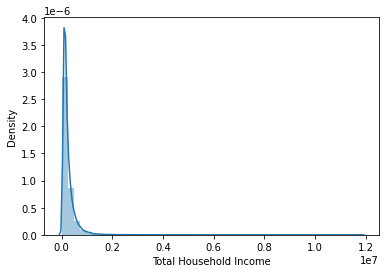

In [7]:
sns.distplot(df['Total Household Income'])

## Checking example data

In [9]:
# Example from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html
from sklearn.preprocessing import quantile_transform

In [10]:
rng = np.random.RandomState(0)
rng

RandomState(MT19937) at 0x1E4FB337AE8

In [31]:
Z = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
Z

array([[0.11593908],
       [0.20871254],
       [0.23231184],
       [0.28230071],
       [0.32879748],
       [0.35528758],
       [0.39920576],
       [0.42211187],
       [0.45501879],
       [0.50262501],
       [0.51404134],
       [0.53172802],
       [0.55206874],
       [0.5890916 ],
       [0.60049734],
       [0.61641561],
       [0.67664329],
       [0.72520662],
       [0.74415976],
       [0.76361293],
       [0.79469489],
       [0.80561127],
       [0.87206305],
       [0.94646762],
       [0.97397229]])

In [32]:
Z.shape

(25, 1)

In [ ]:
# quantile_transform(X, n_quantiles=10, random_state=0, copy=True)

## Trying with my own data

In [40]:
# Try making quantile
testX = df['Total Household Income']

In [48]:
testX.shape

(41544,)

In [41]:
testX = np.array(testX.values.tolist())
testX

array([480332, 198235,  82785, ..., 133171, 129500, 128598])

In [42]:
X = np.reshape(testX, (-1, 1))

In [43]:
X

array([[480332],
       [198235],
       [ 82785],
       ...,
       [133171],
       [129500],
       [128598]])

In [47]:
X.shape

(41544, 1)

In [44]:
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(X)

In [45]:
data_trans

array([[ 1.23270167],
       [ 0.23890468],
       [-1.05454343],
       ...,
       [-0.29982944],
       [-0.34081377],
       [-0.35145697]])

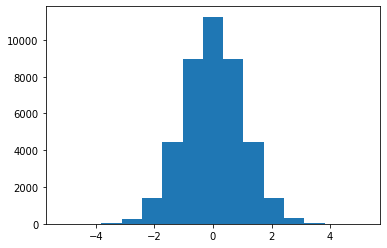

,0
0,1.232702
1,0.238905
2,-1.054543
3,-0.634017
4,0.185931
...,...
41539,-0.463979
41540,-0.253320
41541,-0.299829
41542,-0.340814


In [46]:
# Check distribution
plt.hist(data_trans, bins=15)
plt.show()

data_trans = pd.DataFrame(data_trans)
data_trans

## Now try creating dataset

In [50]:
# Create dataframe for building dataset
income_data = df.iloc[:,[1,3,25,26,27,28,29,30,31]]
income_data

,Region,Main Source of Income,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker
0,CAR,Wage/Salaries,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation
1,CAR,Wage/Salaries,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment
2,CAR,Wage/Salaries,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment
3,CAR,Wage/Salaries,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business
4,CAR,Wage/Salaries,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee
...,...,...,...,...,...,...,...,...,...
41539,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,42,Married,Elementary Graduate,With Job/Business,Rice farmers,Self-employed wihout any employee
41540,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,49,Married,Elementary Graduate,With Job/Business,Rice farmers,Self-employed wihout any employee
41541,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,56,Married,Grade 1,With Job/Business,Rice farmers,Self-employed wihout any employee
41542,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,34,Widowed,First Year High School,With Job/Business,Rice farmers,Self-employed wihout any employee


In [58]:
new_col = pd.DataFrame(data_trans)

In [53]:
income_data = pd.concat([income_data, new_col], axis=1)
income_data

,Region,Main Source of Income,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,0
0,CAR,Wage/Salaries,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,1.232702
1,CAR,Wage/Salaries,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,0.238905
2,CAR,Wage/Salaries,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,-1.054543
3,CAR,Wage/Salaries,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,-0.634017
4,CAR,Wage/Salaries,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,0.185931
...,...,...,...,...,...,...,...,...,...,...
41539,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,42,Married,Elementary Graduate,With Job/Business,Rice farmers,Self-employed wihout any employee,-0.463979
41540,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,49,Married,Elementary Graduate,With Job/Business,Rice farmers,Self-employed wihout any employee,-0.253320
41541,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,56,Married,Grade 1,With Job/Business,Rice farmers,Self-employed wihout any employee,-0.299829
41542,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,34,Widowed,First Year High School,With Job/Business,Rice farmers,Self-employed wihout any employee,-0.340814


In [57]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    41544 non-null  object 
 1   Main Source of Income                     41544 non-null  object 
 2   Household Head Sex                        41544 non-null  object 
 3   Household Head Age                        41544 non-null  int64  
 4   Household Head Marital Status             41544 non-null  object 
 5   Household Head Highest Grade Completed    41544 non-null  object 
 6   Household Head Job or Business Indicator  41544 non-null  object 
 7   Household Head Occupation                 34008 non-null  object 
 8   Household Head Class of Worker            34008 non-null  object 
 9   0                                         41544 non-null  float64
dtypes: float64(1), int64(1), object(8)

In [59]:
# Rename column
income_data.rename(columns={ income_data.columns[9]: "Income" }, inplace = True)

In [60]:
income_data

,Region,Main Source of Income,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Income
0,CAR,Wage/Salaries,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,1.232702
1,CAR,Wage/Salaries,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,0.238905
2,CAR,Wage/Salaries,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,-1.054543
3,CAR,Wage/Salaries,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,-0.634017
4,CAR,Wage/Salaries,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,0.185931
...,...,...,...,...,...,...,...,...,...,...
41539,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,42,Married,Elementary Graduate,With Job/Business,Rice farmers,Self-employed wihout any employee,-0.463979
41540,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,49,Married,Elementary Graduate,With Job/Business,Rice farmers,Self-employed wihout any employee,-0.253320
41541,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,56,Married,Grade 1,With Job/Business,Rice farmers,Self-employed wihout any employee,-0.299829
41542,XII - SOCCSKSARGEN,Enterpreneurial Activities,Male,34,Widowed,First Year High School,With Job/Business,Rice farmers,Self-employed wihout any employee,-0.340814


## EDA

### EDA: Region

In [61]:
# Read this: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
# Do one hot encoding
# Consider use of VIF score
income_data['Region'].value_counts()

IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: Region, dtype: int64

### EDA: Household Head Sex

In [64]:
# Consider not including this because of spread
income_data['Household Head Sex'].value_counts(normalize=True)

Male      0.781894
Female    0.218106
Name: Household Head Sex, dtype: float64

### EDA: Household Head Age

In [65]:
income_data['Household Head Age'].value_counts()

53    1146
46    1140
45    1133
50    1123
49    1123
      ... 
97       3
13       2
14       1
10       1
9        1
Name: Household Head Age, Length: 89, dtype: int64

In [66]:
income_data['Household Head Age'].nunique()

89

C:\Users\marco\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Household Head Age'>

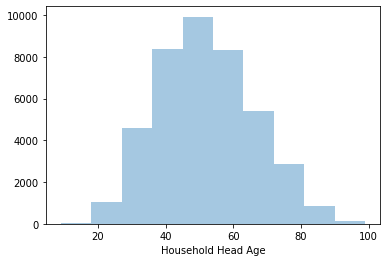

In [67]:
# If using age, have to get rid of < 16 or create age groups
'''
Thoughts:
- Under 16
- 16 to 24
- 24 to 34
- 35 to 44
- 45 to 54
- 54 to 64
- 65 and over
'''
sns.distplot(income_data['Household Head Age'],kde=False,bins=10)

In [68]:
# Function to create 'age-range' column
def setAgeRange(data):
    cat = ''
    if data < 16:
        cat = 'Under 16'
    elif data >= 16 and data <= 24:
        cat = '16 to 24'
    elif data >= 25 and data <= 34:
        cat = '25 to 34'
    elif data >= 35 and data <= 44:
        cat = '35 to 44'
    elif data >= 45 and data <= 54:
        cat = '45 to 54'
    elif data >= 55 and data <= 64:
        cat = '54 to 64'
    elif data >= 65:
        cat = '65 and over'
    else:
        cat = 'Other'
    return cat

In [69]:
income_data['Household Head Age Range'] = income_data.apply(lambda x: setAgeRange(x['Household Head Age']), axis=1)

In [70]:
income_data[['Household Head Age','Household Head Age Range']]

,Household Head Age,Household Head Age Range
0,49,45 to 54
1,40,35 to 44
2,39,35 to 44
3,52,45 to 54
4,65,65 and over
...,...,...
41539,42,35 to 44
41540,49,45 to 54
41541,56,54 to 64
41542,34,25 to 34


In [71]:
income_data['Household Head Age Range'].value_counts(normalize=True)

45 to 54       0.260543
35 to 44       0.220995
54 to 64       0.214881
65 and over    0.186814
25 to 34       0.101627
16 to 24       0.014876
Under 16       0.000265
Name: Household Head Age Range, dtype: float64

In [72]:
del income_data['Household Head Age']

### EDA: Household Head Marital Status

In [73]:
# Consider creating new groupings or not including since data is not diverse enough
income_data['Household Head Marital Status'].value_counts()

Married               31347
Widowed                6818
Single                 1942
Divorced/Separated     1425
Annulled                 11
Unknown                   1
Name: Household Head Marital Status, dtype: int64

In [74]:
income_data['Household Head Marital Status'].value_counts(normalize=True)

Married               0.754549
Widowed               0.164115
Single                0.046746
Divorced/Separated    0.034301
Annulled              0.000265
Unknown               0.000024
Name: Household Head Marital Status, dtype: float64

In [75]:
# Function to split married vs other
def groupOtherMaritalStatus(data):
    cat = ''
    if data == 'Married':
        cat = 'Married'
    else:
        cat = 'Non-Married'
    return cat

In [76]:
income_data['Household Head Marital Group'] = income_data.apply(lambda x: groupOtherMaritalStatus(x['Household Head Marital Status']), axis=1)

In [77]:
income_data['Household Head Marital Group'].value_counts()

Married        31347
Non-Married    10197
Name: Household Head Marital Group, dtype: int64

In [78]:
income_data[['Household Head Marital Status','Household Head Marital Group']].head()

,Household Head Marital Status,Household Head Marital Group
0,Single,Non-Married
1,Married,Married
2,Married,Married
3,Married,Married
4,Married,Married


In [79]:
del income_data['Household Head Marital Status']

### EDA: Household Head Highest Grade Completed

In [80]:
income_data['Household Head Highest Grade Completed'].nunique()

46

In [81]:
# Maybe create new categories for this, like Elementary, Highschool, College / University, Higher Education
# Consider label encoding for this: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
'''
Thoughts:
- No Formal Education
- Completed Elementary
- Completed Highschool
- Completed College / University
- After College / University
- Remove the ones not sure of, if they aren't that many (e.g. "Other Programs.....")
'''
income_data['Household Head Highest Grade Completed'].unique()

array(['Teacher Training and Education Sciences Programs',
       'Transport Services Programs', 'Grade 3', 'Elementary Graduate',
       'Second Year High School', 'Third Year High School',
       'Business and Administration Programs', 'First Year College',
       'High School Graduate',
       'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
       'Humanities Programs', 'First Year High School', 'Grade 6',
       'Grade 4', 'Engineering and Engineering Trades Programs',
       'Grade 2', 'Grade 5', 'Social and Behavioral Science Programs',
       'Agriculture, Forestry, and Fishery Programs', 'Health Programs',
       'Fourth Year College',
       'Engineering and Engineering trades Programs',
       'Second Year College', 'Third Year College', 'Grade 1',
       'No Grade Completed', 'Security Services Programs',
       'Basic Programs', 'First Year Post Secondary',
      

In [82]:
len(income_data[income_data['Household Head Highest Grade Completed'] == 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree'])

66

In [83]:
len(income_data[income_data['Household Head Highest Grade Completed'] == 'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)'])

9

In [84]:
len(income_data[income_data['Household Head Highest Grade Completed'].str.contains('Other')])

75

In [85]:
list(income_data['Household Head Highest Grade Completed'].unique())

['Teacher Training and Education Sciences Programs',
 'Transport Services Programs',
 'Grade 3',
 'Elementary Graduate',
 'Second Year High School',
 'Third Year High School',
 'Business and Administration Programs',
 'First Year College',
 'High School Graduate',
 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
 'Humanities Programs',
 'First Year High School',
 'Grade 6',
 'Grade 4',
 'Engineering and Engineering Trades Programs',
 'Grade 2',
 'Grade 5',
 'Social and Behavioral Science Programs',
 'Agriculture, Forestry, and Fishery Programs',
 'Health Programs',
 'Fourth Year College',
 'Engineering and Engineering trades Programs',
 'Second Year College',
 'Third Year College',
 'Grade 1',
 'No Grade Completed',
 'Security Services Programs',
 'Basic Programs',
 'First Year Post Secondary',
 'Second Year Post Secondary',
 'Post Baccalaureate',
 'Computing/Information Tech

In [86]:
# Import manually created mappings
household_head_highest_grade_mapping = pd.read_excel('./household_head_highest_grade_mapping.xlsx',header=None)

In [87]:
household_head_highest_grade_mapping.head()

,0,1
0,"Agriculture, Forestry, and Fishery Programs",Completed College / University
1,Architecture and Building Programs,Completed College / University
2,Arts Programs,Completed College / University
3,Basic Programs,Completed College / University
4,Business and Administration Programs,Completed College / University


In [88]:
# Create dict from dataframe
keys = list(household_head_highest_grade_mapping[0])
values = list(household_head_highest_grade_mapping[1])

In [89]:
household_head_highest_grade_mapping_dict = {}

for i in range(len(keys)):
    household_head_highest_grade_mapping_dict.update({keys[i]:values[i]})

In [90]:
# TODO: Create mapping function
# Map household head grade mapping
# Maybe I didn't need to do this? :P
def getGradeLevel(data):
    level = household_head_highest_grade_mapping_dict.get(data)
    return level

In [91]:
getGradeLevel('Arts Programs')

'Completed College / University'

In [92]:
income_data['Level Completed'] = income_data['Household Head Highest Grade Completed'].map(household_head_highest_grade_mapping_dict)

In [93]:
income_data[['Household Head Highest Grade Completed','Level Completed']].head()

,Household Head Highest Grade Completed,Level Completed
0,Teacher Training and Education Sciences Programs,Completed College / University
1,Transport Services Programs,Completed College / University
2,Grade 3,Elementary
3,Elementary Graduate,Completed Elementary
4,Elementary Graduate,Completed Elementary


In [94]:
income_data['Level Completed'].value_counts()

Completed Highschool              16220
Completed Elementary               9744
Elementary                         8821
Completed College / University     5441
No Formal Education                1228
Other                                75
Preschool                            15
Name: Level Completed, dtype: int64

In [95]:
del income_data['Household Head Highest Grade Completed']

### EDA: Household Head Job or Business Indicator

In [96]:
income_data['Household Head Job or Business Indicator'].nunique()

2

In [97]:
income_data['Household Head Job or Business Indicator'].value_counts()

With Job/Business    34008
No Job/Business       7536
Name: Household Head Job or Business Indicator, dtype: int64

### EDA: Household Head Occupation

In [98]:
# So many; consider grouping into categories and the using one hot encoding
income_data['Household Head Occupation'].nunique()

378

In [99]:
income_data['Household Head Occupation'].unique()

array(['General elementary education teaching professionals',
       'Transport conductors', 'Farmhands and laborers', 'Rice farmers',
       'General managers/managing proprietors in transportation, storage and communications',
       'Heavy truck and lorry drivers', nan, 'Hog raising farmers',
       'Vegetable farmers',
       'General managers/managing proprietors in wholesale and retail trade',
       'Stocks clerks', 'Justices', 'Other social science professionals',
       'Protective services workers n. e. c.', 'Secretaries',
       'Electronics mechanics and servicers',
       'Foresters and related scientists',
       'Shop salespersons and demonstrators',
       'College, university and higher education teaching professionals',
       'General managers/managing proprietors of restaurants and hotels',
       'Welders and flamecutters', 'Car, taxi and van drivers',
       'Motor vehicle mechanics and related trades workers',
       'Traditional chiefs and heads of villages', 'M

In [100]:
hh_occ = income_data['Household Head Occupation'].value_counts(normalize=True)

In [101]:
hh_occ

Farmhands and laborers                                                                 0.102270
Rice farmers                                                                           0.083774
General managers/managing proprietors in wholesale and retail trade                    0.059633
General managers/managing proprietors in transportation, storage and communications    0.056810
Corn farmers                                                                           0.050694
                                                                                         ...   
Riggers and cable splicers                                                             0.000029
Metal-wheel grinders, polishers and tool sharpeners                                    0.000029
Wood treaters                                                                          0.000029
Business machines mechanics and repairers                                              0.000029
Shotfirers and blasters                 

In [102]:
# Convert to df so it is easier to plot (for me)
hh_occ_df = hh_occ.to_frame().reset_index()

In [103]:
# Rename columns
hh_occ_df = hh_occ_df.rename(columns={"index": "Occupation", "Household Head Occupation": "Percentage"})
hh_occ_df

,Occupation,Percentage
0,Farmhands and laborers,0.102270
1,Rice farmers,0.083774
2,General managers/managing proprietors in whole...,0.059633
3,General managers/managing proprietors in trans...,0.056810
4,Corn farmers,0.050694
...,...,...
373,Riggers and cable splicers,0.000029
374,"Metal-wheel grinders, polishers and tool sharp...",0.000029
375,Wood treaters,0.000029
376,Business machines mechanics and repairers,0.000029


In [104]:
x = hh_occ_df['Occupation']
y = hh_occ_df['Percentage']

C:\Users\marco\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


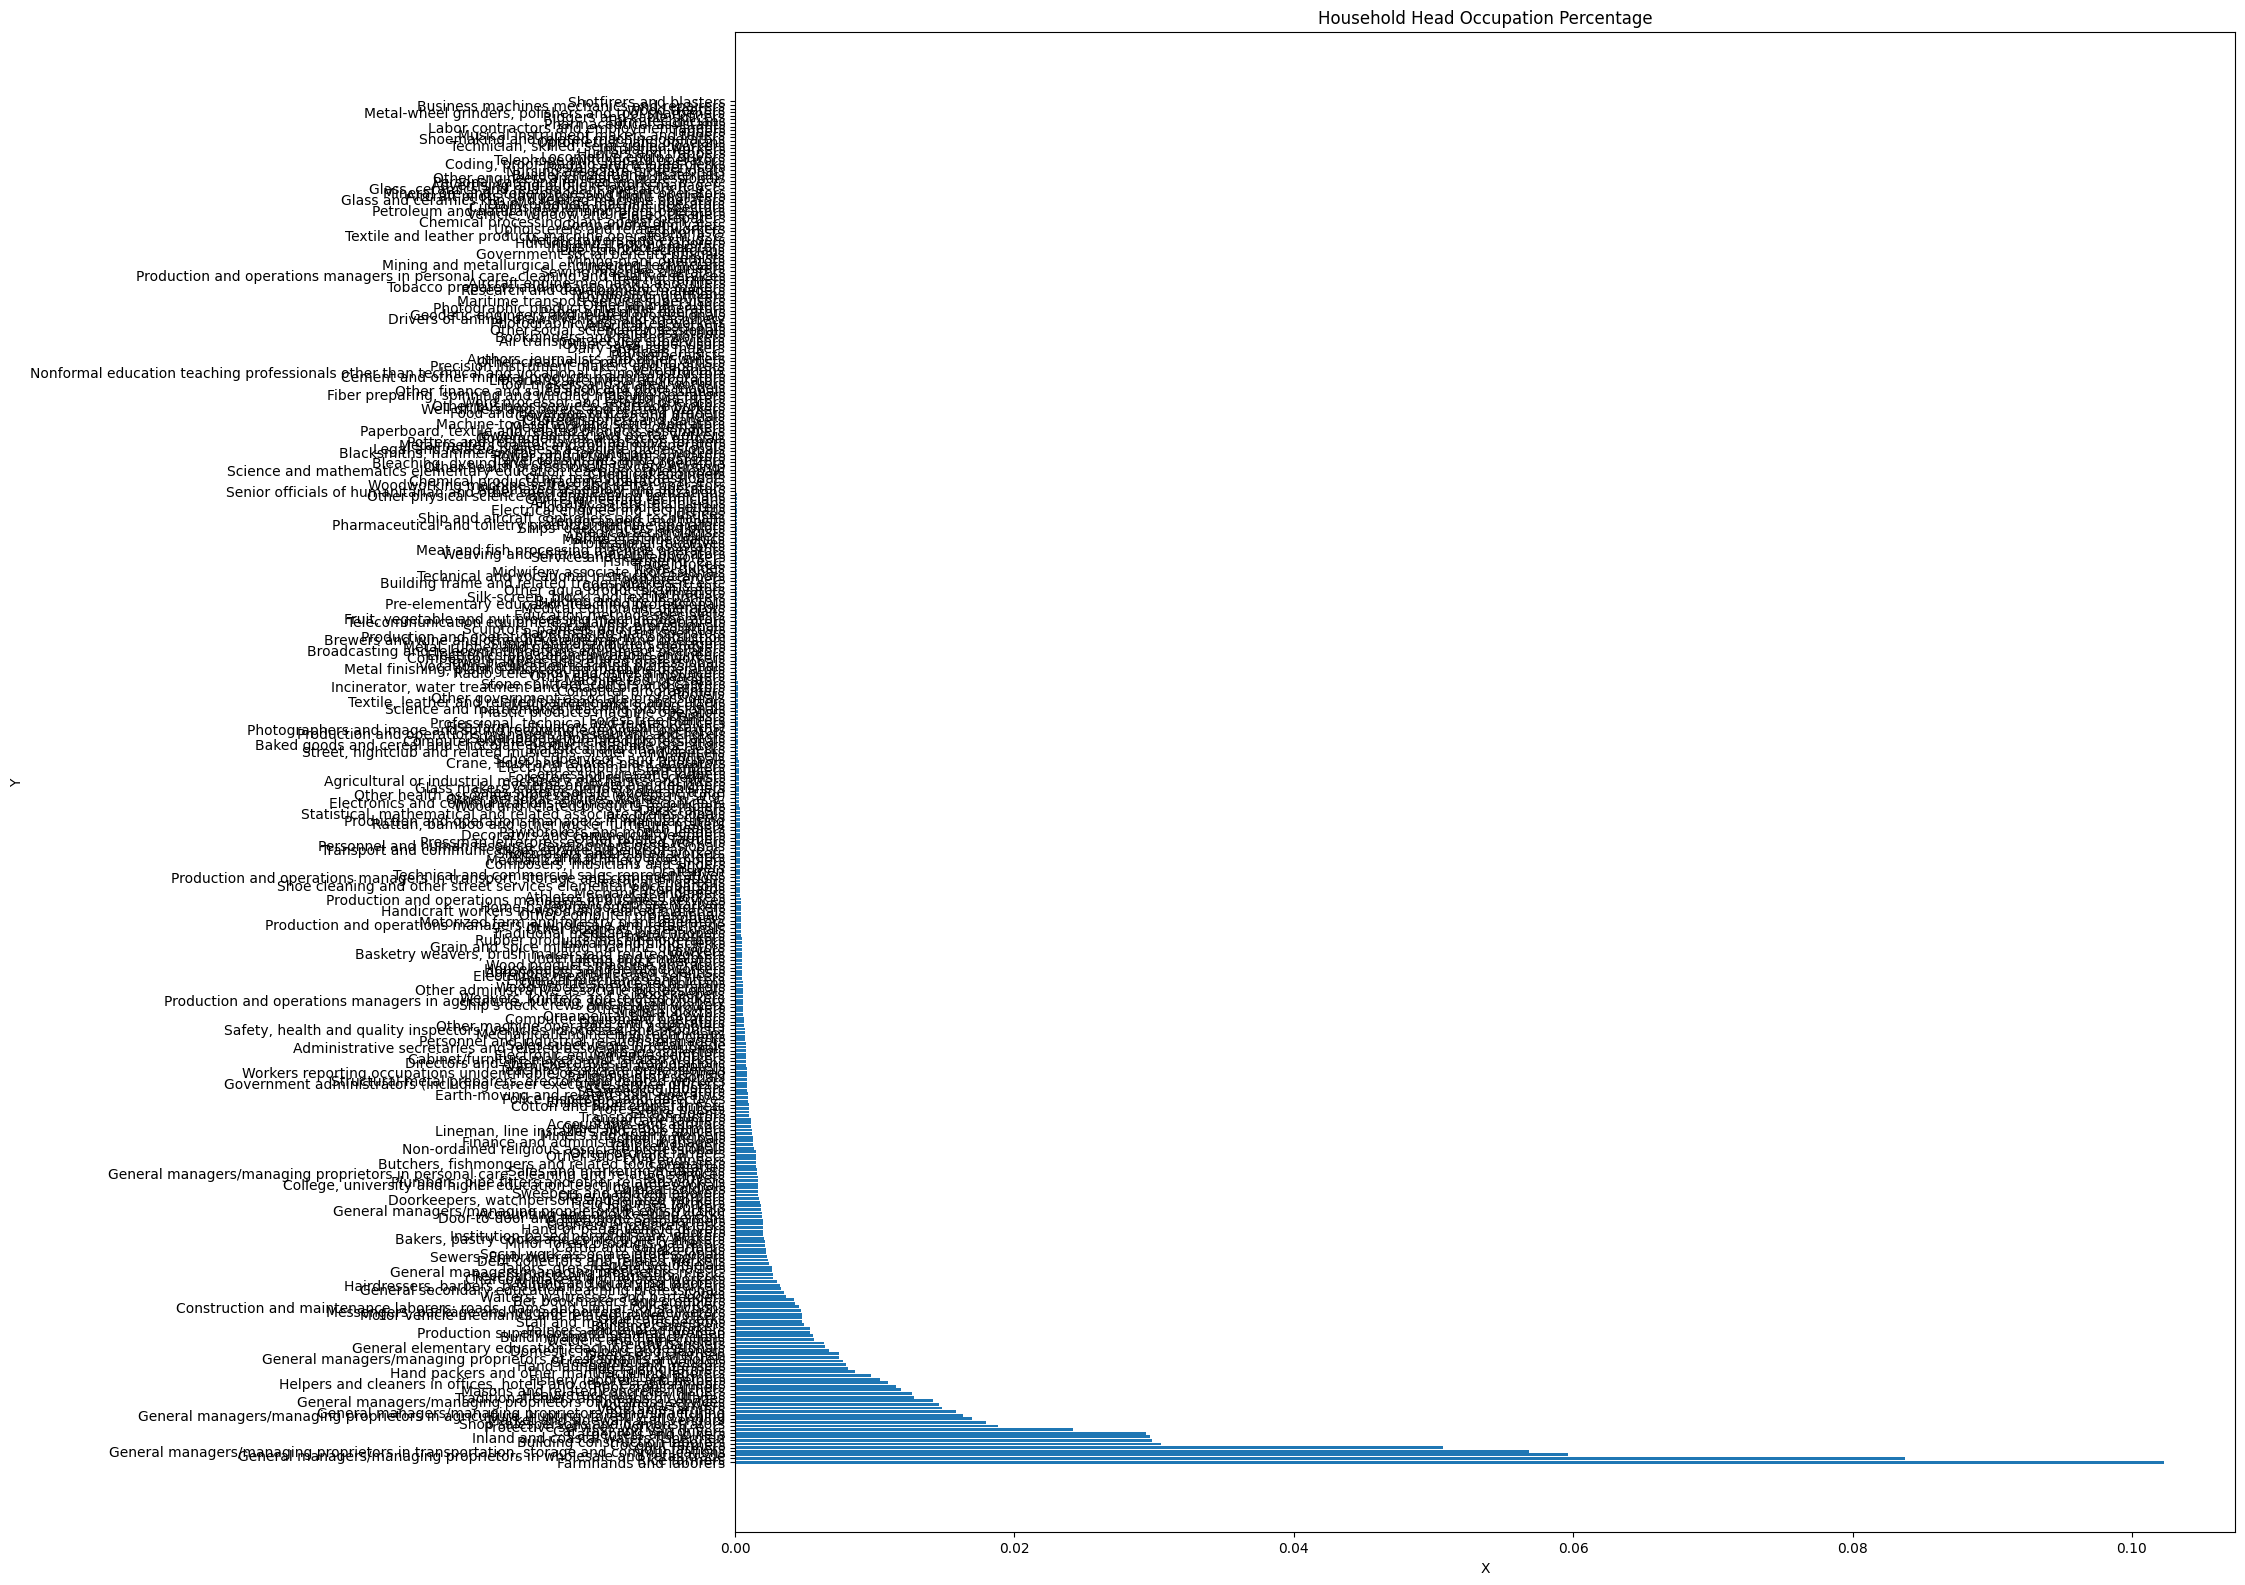

In [105]:
figure = plt.figure(figsize=(15,15),dpi=100)
ax = figure.add_axes([0,0,1,1])
ax.barh(x,y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Household Head Occupation Percentage")
plt.tight_layout()

In [106]:
# Check how many occupations > 1%
# Consider regrouping (new categories)
hh_occ_df[hh_occ_df['Percentage'] > 0.01]

,Occupation,Percentage
0,Farmhands and laborers,0.102270
1,Rice farmers,0.083774
2,General managers/managing proprietors in whole...,0.059633
3,General managers/managing proprietors in trans...,0.056810
4,Corn farmers,0.050694
5,Coconut farmers,0.030463
6,Building construction laborers,0.029817
7,Inland and coastal waters fishermen,0.029728
8,Carpenters and joiners,0.029405
9,"Car, taxi and van drivers",0.024230


In [107]:
len(hh_occ_df[hh_occ_df['Percentage'] > 0.01])

24

In [108]:
len(hh_occ_df[hh_occ_df['Percentage'] < 0.01])

354

In [109]:
list(hh_occ_df['Occupation'].unique())

['Farmhands and laborers',
 'Rice farmers',
 'General managers/managing proprietors in wholesale and retail trade',
 'General managers/managing proprietors in transportation, storage and communications',
 'Corn farmers',
 'Coconut farmers',
 'Building construction laborers',
 'Inland and coastal waters fishermen',
 'Carpenters and joiners',
 'Car, taxi and van drivers',
 'Protective services workers n. e. c.',
 'Shop salespersons and demonstrators',
 'Market and sidewalk stall vendors',
 'General managers/managing proprietors in agriculture, hunting, forestry and fishing',
 'General managers/managing proprietors in manufacturing',
 'Vegetable farmers',
 'Motorcycle drivers',
 'General managers/managing proprietors of business services',
 'Traditional chiefs and heads of villages',
 'Heavy truck and lorry drivers',
 'Masons and related concrete finishers',
 'Root crops farmers',
 'Helpers and cleaners in offices, hotels and other establishments',
 'Fishery laborers and helpers',
 'Fruit

In [110]:
# Create new columns; map according to manual grouping
household_head_occupation_group = pd.read_excel('./household_head_occupation_mapping.xlsx',header=None)
household_head_occupation_group

,0,1
0,Decorators and commercial designers,Arts
1,Choreographers and dancers,Arts
2,"Composers, musicians and singers",Arts
3,Fashion and other models,Arts
4,"Hairdressers, barbers, beauticians and related...",Arts
...,...,...
373,Other life science technicians,Skilled
374,Other physical science and engineering technic...,Skilled
375,"Professional, technical and related officers",Skilled
376,"Technician, skilled, semi-skilled workers",Skilled


In [111]:
# Create dict from dataframe
keys1 = list(household_head_occupation_group[0])
values1 = list(household_head_occupation_group[1])

In [112]:
household_head_occupation_group_dict = {}

In [113]:
for i in range(len(keys1)):
    household_head_occupation_group_dict.update({keys1[i]:values1[i]})

In [114]:
# Create new column
income_data['Household Head Occupation Group'] = income_data['Household Head Occupation'].map(household_head_occupation_group_dict)

In [115]:
income_data['Household Head Occupation Group'].value_counts()

Farming                                          12513
Elementary                                        7588
General Manager or Senior Office Professional     6434
Skilled                                           2157
Other                                             1360
Service Industry                                  1209
Office Professional                               1030
Education                                          481
Public                                             408
Seaman                                             282
Science or Engineering                             164
Arts                                               153
Highly Skilled                                      78
Healthcare                                          76
Religious                                           74
Name: Household Head Occupation Group, dtype: int64

In [116]:
del income_data['Household Head Occupation']

### EDA: Household Head Class of Worker

In [117]:
income_data['Household Head Class of Worker'].nunique()

7

In [118]:
income_data['Household Head Class of Worker'].unique()

array(['Worked for government/government corporation',
       'Worked for private establishment',
       'Employer in own family-operated farm or business',
       'Self-employed wihout any employee', nan,
       'Worked without pay in own family-operated farm or business',
       'Worked for private household',
       'Worked with pay in own family-operated farm or business'],
      dtype=object)

In [119]:
income_data['Household Head Class of Worker'].value_counts()

Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: Household Head Class of Worker, dtype: int64

In [120]:
# Consider grouping all categories under 40% under the same category
income_data['Household Head Class of Worker'].value_counts(normalize=True)

Self-employed wihout any employee                             0.404787
Worked for private establishment                              0.403758
Worked for government/government corporation                  0.082922
Employer in own family-operated farm or business              0.075894
Worked for private household                                  0.023847
Worked without pay in own family-operated farm or business    0.008380
Worked with pay in own family-operated farm or business       0.000412
Name: Household Head Class of Worker, dtype: float64

In [121]:
# Function to group the ones outside the 80%
def groupOtherWorkerClass(data):
    cat = ''
    if data == 'Self-employed wihout any employee':
        cat = data
    elif data == 'Worked for private establishment':
        cat = data
    else:
        cat = 'Other'
    return cat

In [122]:
income_data['Household Head Class of Worker Group'] = income_data.apply(lambda x: groupOtherWorkerClass(x['Household Head Class of Worker']), axis=1)

In [123]:
income_data['Household Head Class of Worker Group'].value_counts(normalize=True)

Other                                0.338123
Self-employed wihout any employee    0.331360
Worked for private establishment     0.330517
Name: Household Head Class of Worker Group, dtype: float64

In [124]:
del income_data['Household Head Class of Worker']

## Data Prep

In [125]:
# One hot encoding
data_for_model = pd.get_dummies(income_data, drop_first=False);

In [126]:
data_for_model.shape

(41544, 59)

## Train and Test Data -> With Quantile Transform

In [127]:
data_for_model

,Income,Region_ ARMM,Region_CAR,Region_Caraga,Region_I - Ilocos Region,Region_II - Cagayan Valley,Region_III - Central Luzon,Region_IVA - CALABARZON,Region_IVB - MIMAROPA,Region_IX - Zasmboanga Peninsula,...,Household Head Occupation Group_Other,Household Head Occupation Group_Public,Household Head Occupation Group_Religious,Household Head Occupation Group_Science or Engineering,Household Head Occupation Group_Seaman,Household Head Occupation Group_Service Industry,Household Head Occupation Group_Skilled,Household Head Class of Worker Group_Other,Household Head Class of Worker Group_Self-employed wihout any employee,Household Head Class of Worker Group_Worked for private establishment
0,1.232702,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.238905,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.054543,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.634017,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.185931,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,-0.463979,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41540,-0.253320,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41541,-0.299829,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41542,-0.340814,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


C:\Users\marco\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

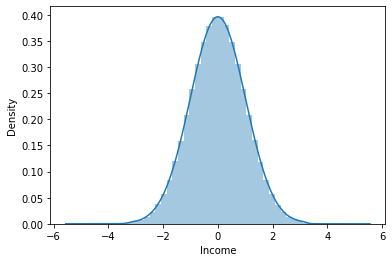

In [132]:
sns.distplot(data_for_model['Income'])

In [133]:
# Set X to all columns except for first column
X = data_for_model[data_for_model.columns[-58:]]

In [134]:
X

,Region_ ARMM,Region_CAR,Region_Caraga,Region_I - Ilocos Region,Region_II - Cagayan Valley,Region_III - Central Luzon,Region_IVA - CALABARZON,Region_IVB - MIMAROPA,Region_IX - Zasmboanga Peninsula,Region_NCR,...,Household Head Occupation Group_Other,Household Head Occupation Group_Public,Household Head Occupation Group_Religious,Household Head Occupation Group_Science or Engineering,Household Head Occupation Group_Seaman,Household Head Occupation Group_Service Industry,Household Head Occupation Group_Skilled,Household Head Class of Worker Group_Other,Household Head Class of Worker Group_Self-employed wihout any employee,Household Head Class of Worker Group_Worked for private establishment
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [135]:
# Set Y to Total Household Income (What we want to predict)
y = data_for_model['Income']

In [136]:
y

0        1.232702
1        0.238905
2       -1.054543
3       -0.634017
4        0.185931
           ...   
41539   -0.463979
41540   -0.253320
41541   -0.299829
41542   -0.340814
41543   -0.351457
Name: Income, Length: 41544, dtype: float64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [138]:
X_train

,Region_ ARMM,Region_CAR,Region_Caraga,Region_I - Ilocos Region,Region_II - Cagayan Valley,Region_III - Central Luzon,Region_IVA - CALABARZON,Region_IVB - MIMAROPA,Region_IX - Zasmboanga Peninsula,Region_NCR,...,Household Head Occupation Group_Other,Household Head Occupation Group_Public,Household Head Occupation Group_Religious,Household Head Occupation Group_Science or Engineering,Household Head Occupation Group_Seaman,Household Head Occupation Group_Service Industry,Household Head Occupation Group_Skilled,Household Head Class of Worker Group_Other,Household Head Class of Worker Group_Self-employed wihout any employee,Household Head Class of Worker Group_Worked for private establishment
14583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2241,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30143,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26332,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5695,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Trying Feature_Selection library - Mutual Information
Ref: https://machinelearningmastery.com/feature-selection-for-regression-data/

In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

In [140]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')

In [ ]:
# learn relationship from training data
fs.fit(X_train, y_train)

In [ ]:
# transform train input data
X_train_fs = fs.transform(X_train)

In [ ]:
# transform test input data
X_test_fs = fs.transform(X_test)

In [ ]:
# numpy array
X_train_fs

In [ ]:
X_train_fs.shape

In [ ]:
X_test_fs

In [ ]:
X_test_fs.shape

In [ ]:
fs

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

In [ ]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
X_train.info()

In [ ]:
# TODO: Remove features not needed
'''
X_train = X_train.iloc[:,[0,9,17,27,33,35,36,43]]
X_train
'''

In [ ]:
'''
X_test = X_test.iloc[:,[0,9,17,27,33,35,36,43]]
X_test
'''

## Train model

In [ ]:
# MSJ
model = LinearRegression()

In [ ]:
# MSJ
model.fit(X_train,y_train)

In [ ]:
# MSJ: coefficients
# model.coef_,X.columns
# coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
# coeff_df

## Predicting Test Data

In [ ]:
# MSJ
predictions = model.predict(X_test)
predictions

## Check Model

In [ ]:
# MSJ
plt.scatter(y_test,predictions)

In [ ]:
# MSJ - Evaluate - Check MAE, MSE and RMSE
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
# Residuals
sns.distplot((y_test-predictions),bins=50);